This notebook is to play around with exponential models.

In [1]:
! conda install statsmodels -y

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.10.3
  latest version: 23.1.0

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.



In [68]:
# Import modules
import numpy as np
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import sklearn

ModuleNotFoundError: No module named 'sklearn'

In [4]:
df = pd.read_csv("../outputs/mutational_model_stats.tsv", sep="\t")

In [10]:
sns.set_context("talk")

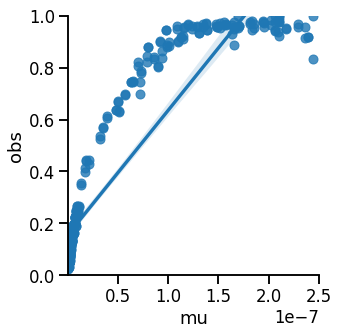

In [11]:
g = (sns.lmplot(data=df,
                x="mu",
                y="obs"
               )
    )
(g.set(xlim=(8.9*10**-10, 2.5*10**-7),
       ylim=(0,1),
      )
)

In [13]:
df["log_obs"] = np.log(df["obs"])

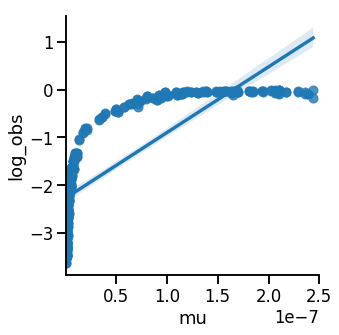

In [14]:
g = (sns.lmplot(data=df,
                x="mu",
                y="log_obs"
               )
    )
(g.set(xlim=(8.9*10**-10, 2.5*10**-7),
       #ylim=(0,1),
      )
)

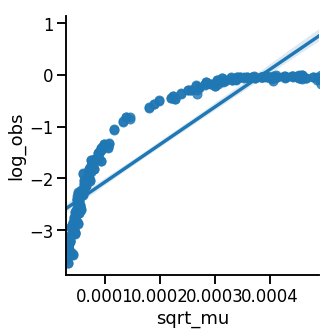

In [19]:
g = (sns.lmplot(data=df,
                x="sqrt_mu",
                y="log_obs"
               )
    )
(g.set(
    xlim=(3*10**-5, 4.9*10**-4),
       #ylim=(0,1),
      )
)

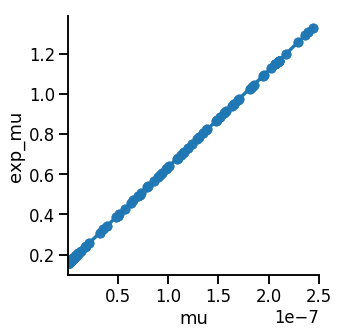

In [38]:
g = (sns.lmplot(data=df,
                x="mu",
                y="exp_mu"
               )
    )

(g.set(xlim=(8.9*10**-10, 2.5*10**-7),
       #ylim=(0,1),
      )
)

In [62]:
df = df[df["obs"] != 1]

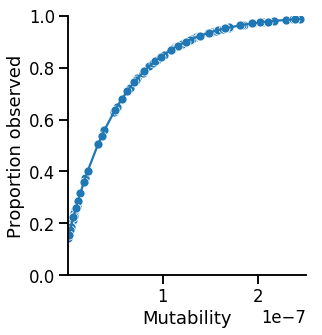

In [111]:
A, B = np.polyfit(df["mu"], np.log(1 - df["obs"]), 1)

df["fit_obs"] = 1 - (np.exp(B)) * (np.exp(A * df["mu"]))
#p = np.poly1d(fit)
#df["exp_mu"] = p(df["mu"])

g = (sns.relplot(kind="scatter",
                data=df,
                x="mu",
                y="fit_obs",
               )
    )

(g.set(xlim=(8.9*10**-10, 2.5*10**-7),
       ylim=(0,1),
       xlabel="Mutability",
       ylabel="Proportion observed"
      )
)
plt.plot(sorted(df["mu"]), sorted(df["fit_obs"]))